# Parte 1

### Integrantes: Fernanda Weiss y Fabián Fernández

En el presente se trabajará con el dataset *House Sales in King County, USA* el cuál se utilizará en el presente trabajo para evaluar modelos simples de regresión líneal. El dataset nos entrega información sobre distintas características asociadas a las ventas de casas en la localidad King County, en el rango de un año (entre mayo de 2014 y mayo de 2015), como la cantidad de habitaciones, cantidad de baños, número de pisos, etc.

### a) Construcción de dataset

[//]: <> (a. Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indic´o. Explique por qu´e se realiza la l´ınea 4.)

Comenzaremos construyendo un dataframe con los datos descritos previamente. 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


Es importante notar que al construir el dataframe se realiza una modificación a los datos originales en la línea 4, la que realiza lo siguiente:

* Se eliminan las columnas que no agregan valor al análisis que se realizará, estas columnas son el *identificador (id), fecha (date) y cógido zip* (zipcode), esto es, no será posible realizar una estimación del precio con estas variables.



* Mediante la opción *axis=1* se especifica el eje a través del cual se hará la acción, es decir en fila o columna. Por defecto se tiene *axis=0* que indica que se realice por fila, al indicar *axis=1* se indica que se realice por columna.
[//]: <> (It specifies the axis along which the means are computed. By default axis=0. This is consistent with the numpy.mean usage when axis is specified explicitly -in numpy.mean, axis==None by default, which computes the mean  value over the flattened array , in which axis=0 along the rows -namely, index in pandas, and axis=1 along the columns. https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean Note: axis=1 denotes that we are referring to a column, not a row )
* Mediante la opción *inplace* se indica que la modificación se realice directamente en el dataframe, sin tener que reasignarlo.
[//]: <> (https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe-using-python-del)

### b) Descripción de dataset

[//]: <> (b. Describa brevemente el dataset a utilizar.)
Luego se describe brevemente el dataset a utilizar.

In [2]:

#Return a tuple representing the dimensionality of the DataFrame
print "info"
df.info()


info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


Con df.info() es posible ver la información asociada a cada columna, la cantidad de datos, si tiene algún dato nulo, y el tipo de dato. Los atributos para predecir el valor de una casa están especificados como:

<ul>
    <li><strong>price</strong> : Corresponda al precio de la casa, es la predicción objetivo del modelo. </li>
    <li><strong>bedrooms</strong> : Número de dormitorios por casa. </li>
    <li><strong>bathrooms</strong> : Número de baños por dormitorio.</li>
    <li><strong>sqft_living</strong> : Pies cuadrados de la casa. </li>
    <li><strong>sqft_lot</strong> : Pies de cuadrados del terreno. </li>
    <li><strong>floors</strong> : Total de pisos en la casa. </li>
    <li><strong>waterfront</strong> : Casa que tiene una vista al mar. </li>
    <li><strong>view</strong> : Cantidad de veces que ha sido vista la casa. </li>
    <li><strong>condition</strong> : Que tan buena es la condición de la casa. </li>
    <li><strong>grade</strong> : Grado general dado a la unidad de vivienda, basado en el sistema de clasificación del condado        de King.  </li>
    <li><strong>sqft_above</strong>: Pies cuadrados aparte del sótano. </li>
    <li><strong>sqtf_basement</strong> : Pies cuadrados del sótano. </li>
    <li><strong>yr_built</strong> : Año de construcción de la vivienda. </li>
    <li><strong>yr_renovate</strong> : Año en que la casa fue renovada. </li>
    <li><strong>lat</strong> : Coordenada de latitud. </li>
    <li><strong>long</strong> : Coordenada de longitud. </li>
    <li><strong>sqft_living15</strong>: Área de la sala de estar en 2015 ( implica alguna renovación). Esto podría o no haber       afectado al área del terreno. </li>
    <li><strong>sqft_lot15</strong> : Área del tamaño del terreno en 2015 ( implica alguna renovación).</li>
</ul>


In [3]:
print "shape:",df.shape

shape: (21613, 18)


El comando df.shape visualiza la dimensión del dataframe. La cual consiste en 21613 datos entre el conjunto de entrenamiento y de prueba. Cada dato contiene 18 atributos, los anteriormente descritos.

In [4]:
print "Descripción"
df.describe()


Descripción


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Se ven las 18 columnas que contiene el dataframe, además podemos observar las características de cada una de ellas, como la cantidad de registros para cada una, el promedio, desviación estándar, mínimo, máximo y los percentiles 20, 50 y 75.

Cada columna indica una característica de la casa en venta. Se puede observar que existen 21.613 registros de casas, en las cuales se cumple que no existen valores nulos y son valores númericos, donde la mayoría son enteros, excepto cinco características entre las que se encuentran los baños y pisos, lo que es extraño que no sean valores enteros. 

### c) Normalización de datos y transformación variable a predecir

[//]: <> (c. Normalice los datos antes de trabajar y aplique una transformación adecuada a la variable a predecir. Explique la importancia/conveniencia de realizar estas dos operaciones.)

A continuación se procede a normalizar los datos y aplicar una transformación a la variable precio:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])  #creo que esta es la transformación 


Se creó un nuevo dataframe en base al anterior, pero normalizado. Ésta transformación centra los valores con media 0 y los escala en una varianza unitaria.

Es importante mencionar que es conveniente hacer estas operaciones dado que en varias funciones objetivos del ámbito de maching learning, se utilizan elementos que asumen que todas las características están centradas en 0, como por ejemplo regularizadores y kernels. Además es importante que las varianzas estén en el mismo orden, pues de lo contrario alguna de las características podría predominar dentro de la función objetivo, y así la máquina no puede aprender correctamentemente las otras características.

Por otro lado, se debe destacar la transformación posterior que se le realizó a la característica del precio, la cual consiste en una linealización de los datos al aplicar la función logarítmica. Esto es, ya que no se sabe a priori el comportamiento de la variable **precio**, dado que  puede ser cuadrática, cúbica o de otro grado, como la regresión precide una variable lineal, se tiene que dejar de esta forma para que el modelo propuesto sea válido.

### d) Regresión lineal de mínimos cuadrados básica

[//]: <> (d Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia/conveniencia del paso 4 y los argumentos que se deben entregar a la función que implementa la regresión lineal. http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling)

Se procede a realizar una regresión líneal de mínimos cuadrados básica,

In [6]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N)) ##Agregamos interceptos a matriz X
y = df_scaled['price']  #Variable transformada!!!!!
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
# Acá toma el 70% de los datos para entrenar.
# Define el conjunto de entrenamiento
Xtrain = X[istrain]
ytrain = y[istrain]

#Define el conjunto de test
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

linreg = lm.LinearRegression(fit_intercept = False)
modelo = linreg.fit(Xtrain, ytrain)

Es importante destacar, que en la línea 4 se añaden una nueva columna al dataframe con coeficientes unitarios la cual permitirá que se agreguen los interceptos sin alteración de estos en la regresión lineal.
El argumento que se debe entregar a la función es fit_intercept con valor falso, dado que los interceptos ya fueron considerados según la explicación anterior. 

###  e) Pesos y Z-score

A continuación se presenta una tabla con los pesos y Z-score correspondientes a cada predictor.

In [7]:
from numpy import linalg as LA
def getStandardRegressionError(linreg, Xtrain , ytrain ):
   std_reg = np.sqrt(((linreg.predict(Xtrain) - ytrain) ** 2).sum()/21594)
   return std_reg

def getZscore(linreg,std_reg,K):
   inverse_covariance = np.linalg.inv(Xtrain.transpose().dot(Xtrain))
   z_score = np.ones(K)
   for i in range(0,K):
      z_score[i] = linreg.coef_[i]/(std_reg *np.sqrt((inverse_covariance[i,i])))
      
   return z_score 

st_error = getStandardRegressionError(modelo,Xtrain,ytrain)
#print(regresion_error)

cantidad_variables = (len(modelo.coef_[:]))

Z_score = getZscore(modelo,st_error,cantidad_variables)
nombres = list(Xtrain.columns[:-1])
nombres.append('intercept')
def do_table(nombres,modelo,Z_score):
    cantidad_variables = (len(modelo.coef_[:]))
    for i in range(cantidad_variables):
        print('<tr><td>'+nombres[i]+'</td><td>'+str(round(modelo.coef_[i],4))+'</td><td>'+str(round(Z_score[i],4))+'</td></tr>')
    
#do_table(nombres,modelo,Z_score)

<table style="width:100%">
<tr>
        <th>Atributo</th>
        <th>Coeficiente</th>
        <th>Z-score</th>
</tr>
<tr><td>bedrooms</td><td>-0.0071</td><td>-3.1244</td></tr>
<tr><td>bathrooms</td><td>0.057</td><td>17.8574</td></tr>
<tr><td>sqft_living</td><td>-3.54349922406e+12</td><td>-31427226.961</td></tr>
<tr><td>sqft_lot</td><td>0.0225</td><td>9.2179</td></tr>
<tr><td>floors</td><td>0.0372</td><td>14.5084</td></tr>
<tr><td>waterfront</td><td>0.0333</td><td>17.5574</td></tr>
<tr><td>view</td><td>0.0424</td><td>20.9556</td></tr>
<tr><td>condition</td><td>0.0458</td><td>24.809</td></tr>
<tr><td>grade</td><td>0.1844</td><td>56.904</td></tr>
<tr><td>sqft_above</td><td>3.19491406164e+12</td><td>31427226.961</td></tr>
<tr><td>sqft_basement</td><td>1.70752884084e+12</td><td>31427226.961</td></tr>
<tr><td>yr_built</td><td>-0.1101</td><td>-40.4754</td></tr>
<tr><td>yr_renovated</td><td>0.0146</td><td>8.1521</td></tr>
<tr><td>lat</td><td>0.1858</td><td>102.2836</td></tr>
<tr><td>long</td><td>-0.0043</td><td>-1.9904</td></tr>
<tr><td>sqft_living15</td><td>0.0883</td><td>28.9337</td></tr>
<tr><td>sqft_lot15</td><td>-0.0082</td><td>-3.2716</td></tr>
<tr><td>intercept</td><td>13.0395</td><td>7435.1966</td></tr>
</table>

In [8]:
print "Condicionamiento de la matriz X:", LA.cond(Xtrain)

Condicionamiento de la matriz X: 3.20933985079e+15


Observando la tabla anterior, es posible dar cuenta de existen cosas anómalas en el resultado de la regresión lineal. Por ejemplo, los atributos *sqft_living, sqft_above y sqft_basement* tienen un peso y z-score demasiado alto en comparación al resto de las características. 

Lo anterior es atribuible al mal condicionamiento de la matriz, que es de $3,21 \cdot 10^{15}$, valor que está muy lejana al 1 que es el valor que implica que la matriz esté bien condicionada. Este mal condicionamiento de la matriz puede ser porque existen características que son linealmente dependientes de otras. El gran valor del número de condicionamiento implica que esta matriz está muy cercana a ser singular ( no invertible ) y el cálculo de su inversa, o solución de un sistema lineal de ecuaciones es propenso a grandes errores numéricos.

Para ver las variables que están más correlacionadas con la respuesta, podemos suponer una hipótesis nula tal que  $H_{0} :B _{j}= 0$ , la cual se acepta o rechaza dependiendo de los valores de Z-scores:

<center>${z_{j}= \frac{B_{j}}{\lambda \sqrt{v_{jj}}}}$</center>

Donde,

<center>$v_{jj} = (X^{T}X)^{-1}_{jj}$</center>

Esto lo hacemos al 5% con la distribución t con 21593 grados de libertad, bajo esto, todo valor absoluto de Z-score mayor a 1.960 conllevará un rechazo a la hipotesis nula, implicando que su coeficiente es no nulo, por ende estará correlacionado con la respuesta. Con este criterio, todos los atributos serían relevantes pero está sesgado al mal condicionamiento de la matriz.	

### f) Método de corrección de lo observado

Para corregir lo anterior, se podrían aplicar dos métodos por lo bajo:
1. Encontrar las características linealmente dependientes de otras y eliminarlas.
2. Aplicar un regularizador que afecte lo menos posible a la regresión lineal original, pero que aún así arregle los atributos inconsistentes.

De las opciones anteriores se escogerá la segunda, debido que la primera requiere mucho costo computacional para encontrar las características linealmente dependientes, y además, el hecho de eliminar características por completo,  consideramos una medida demasiado radical.

Por lo tanto, se aplica un regularizador de Ridge con un lambda lo más pequeño posible. Para obtener este pequeño valor, se obtienen los valores propios de la matriz original, así el más diminuto se considera como el parámetro lambda para la regularización de Ridge. 
*( T. Hastie, R. Tibshirani, and J. Friedman. The Elements of Statistical Learning. Springer Series in
Statistics. Springer New York Inc., New York, NY, USA, 2009. Capitulo 3 63-64)*


Se sabe que para obtener los valores propios de una matriz, ésta debe ser cuadrada, sin embargo nuestra matriz es rectangular de 21613 x 18. Por lo tanto, se calculan los valores propios de la matriz original por su transpuesta. El resultado anterior, no dará el valor exacto del menor valor propio, pero si dará un valor aproximado de este, que es lo que buscamos.

In [9]:
from sklearn.linear_model import Ridge 

Z = Xtrain.transpose().dot(Xtrain)
[V, D] = LA.eig(Z)
min_eigenvalue =  min(V) # Equivale al valor propio de la matriz
eigenvalue_mean = V.mean()
min_eigenvalue = eigenvalue_mean
#https://stackoverflow.com/questions/22631956/how-to-find-eigenvalues-for-non-quadratic-matrix
clf = Ridge(alpha=min_eigenvalue,fit_intercept=False)
modelo_regularizado = clf.fit(Xtrain, ytrain)
st_error_reg = getStandardRegressionError(modelo_regularizado,Xtrain,ytrain)
Z_score_reg = getZscore(modelo_regularizado,st_error_reg,cantidad_variables)

#for i in range(cantidad_variables):
    #print Z_score[i],modelo.coef_[i],Z_score_reg[i],modelo_regularizado.coef_[i]
    
#do_table(nombres,modelo_regularizado,Z_score_reg)

#Ver relevantes:
relevantes = []
for i in range(cantidad_variables):
    if (abs(Z_score_reg[i]) > 1.96):
        relevantes.append(i)
print relevantes
    


[4, 7, 11, 17]


<table style="width:100%">
<tr>
        <th>Atributo</th>
        <th>Coeficiente</th>
        <th>Z-score</th>
</tr>
<tr><td>bedrooms</td><td>0.0458</td><td>0.7864</td></tr>
<tr><td>bathrooms</td><td>-0.0721</td><td>-0.8836</td></tr>
<tr><td>sqft_living</td><td>0.075</td><td>0.0</td></tr>
<tr><td>sqft_lot</td><td>0.0543</td><td>0.8705</td></tr>
<tr><td>floors</td><td>-0.2586</td><td>-3.949</td></tr>
<tr><td>waterfront</td><td>0.0177</td><td>0.3654</td></tr>
<tr><td>view</td><td>0.0672</td><td>1.3001</td></tr>
<tr><td>condition</td><td>0.1267</td><td>2.6891</td></tr>
<tr><td>grade</td><td>0.034</td><td>0.4105</td></tr>
<tr><td>sqft_above</td><td>0.0454</td><td>0.0</td></tr>
<tr><td>sqft_basement</td><td>0.0708</td><td>0.0</td></tr>
<tr><td>yr_built</td><td>-0.3935</td><td>-5.6613</td></tr>
<tr><td>yr_renovated</td><td>0.0377</td><td>0.8203</td></tr>
<tr><td>lat</td><td>0.09</td><td>1.9393</td></tr>
<tr><td>long</td><td>0.0662</td><td>1.2076</td></tr>
<tr><td>sqft_living15</td><td>0.1254</td><td>1.6093</td></tr>
<tr><td>sqft_lot15</td><td>0.0723</td><td>1.1318</td></tr>
<tr><td>intercept</td><td>6.4896</td><td>144.8315</td></tr>
</table>

Realizando la regresión lineal con el regularizador de Ridge, se puede ver mediante los nuevos pesos y z-score obtenidos que solo se modificaron los atributos que anteriormente tenían problemas, afectando de forma casi nula al resto, gracias al pequeño regularizador. En base al estadístico observamos que las variables más correlacionadas con este nuevo modelo regurizado corresponden a la cantidad de pisos que tiene la casa, la condición en la cual se encuentra y el año en que fue construida 

### g) Validación cruzada

Se estimará el error de predicción utilizando validación cruzada con número de folds K=5 y K=10.

### Modelo no regularizado

In [10]:
#K=5
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_5 = mse_cv / 5
print "mse_test:",mse_test
print "mse_cv",mse_cv_5

mse_test: 0.0654124075861
mse_cv 0.0646902919559


In [11]:
#K = 10

yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_10 = mse_cv / 10
print "mse_test:",mse_test
print "mse_cv",mse_cv_10
print "Diferencia k=5 y k=10",(mse_cv_10 - mse_cv_5)

mse_test: 0.0653598742452
mse_cv 0.0646905656615
Diferencia k=5 y k=10 2.73705611634e-07


In [12]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=15)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_15 = mse_cv / 15
print "Diferencia k=15 y k=10",(mse_cv_15 - mse_cv_10)

Diferencia k=15 y k=10 1.02138864932e-05


In [13]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10000)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_1000 = mse_cv / 10000
print "Diferencia k=15 y k=10000",(mse_cv_1000 - mse_cv_15)

Diferencia k=15 y k=10000 -2.00950435097e-06


### Modelo  regularizado

In [14]:
#K=5
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mse_cv = 0
for train, val in kf.split(Xm):
    clf = Ridge(alpha=min_eigenvalue,fit_intercept=False)
    modelo_regularizado = clf.fit(Xtrain, ytrain)
    yhat_val = modelo_regularizado.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_5 = mse_cv / 5
print "mse_test:",mse_test
print "mse_cv",mse_cv_5

mse_test: 0.0653128519496
mse_cv 42.126762245


In [15]:
#K = 10
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    clf = Ridge(alpha=min_eigenvalue,fit_intercept=False)
    modelo_regularizado = clf.fit(Xtrain, ytrain)
    yhat_val = modelo_regularizado.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_10 = mse_cv / 10
print "mse_test:",mse_test
print "mse_cv K=5:",mse_cv_5
print "mse_cv K=10:",mse_cv_10
print "Diferencia k=5 y k=10",(mse_cv_10 - mse_cv_5)
print "diferencia k=5 y mse_test",(mse_test - mse_cv_5)
print "diferencia k=10 y mse_test",(mse_test - mse_cv_10)

mse_test: 0.0653128519496
mse_cv K=5: 42.126762245
mse_cv K=10: 42.1267674614
Diferencia k=5 y k=10 5.21634184025e-06
diferencia k=5 y mse_test -42.0614493931
diferencia k=10 y mse_test -42.0614546094


En base a los errores de validación obtenidos, se puede concluir que al realizar validación cruzada con un 5 folds se obtiene un valor milésimas más cercano al error real del modelo que con 10 folds. Hay un cierto número de folds óptimo que puede predecir de mejor manera el error del modelo, luego de eso el error de validación se aleja del error real del modelo lentamente. 

Pd: Se podría hacer un gráfico para encontrar k óptimo con tal que el error de validación sea el más cercano la predicción real del modelo con el conjunto de pruebas.

### h)  Quantile-Quantile plot

A continuación se presenta un gráfico quantile-quantile plot sobre los residuos del modelo contra la hipótesis de normalidad.

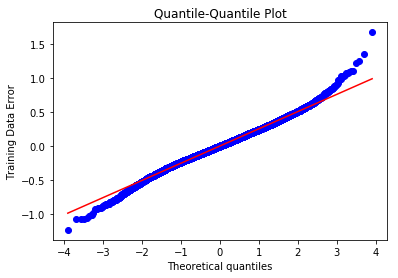

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt
def getQQPlot(Xtrain,ytrain):
   predict = linreg.predict(Xtrain)
   ytrain = np.asarray(ytrain)
   prediction_error = predict - ytrain 
   
   normal = stats.probplot(prediction_error, dist='norm', plot=plt)
   plt.ylabel('Training Data Error')
   plt.title('Quantile-Quantile Plot')
   plt.show()
   prediction_error.sort()
   norm= np.random.normal(0,2,len(predict))
   norm.sort()
   slope, intercept, r_value, p_value, std_err = stats.linregress(prediction_error,norm)
   

getQQPlot(Xtrain,ytrain)



$R^{2}: 0.9970$

En base al gráfico, donde la línea roja corresponde a la hipótesis de normalidad y los puntos azules corresponden al comportamiento de los residuos, es posible determinar que los residuos sí se ajustan bien a la distribución normal. El coeficiente de determinación $R^{2} = 0.997$ respalda lo anteriormente mencionado dado que es cercano a 1 el cual indica máxima correlación entre los datos.

# Parte 2

### a) Forward Step-wise Selection (FSS)

FSS consiste en ir agregando un predictor a la vez según algun criterio, reajustando el modelo cada vez que se agregue una variable, estos criterios pueden ser variados, aqui proponemos 2 aparte del error cuadrático medio:

1) Error absoluto medio<br><br>
<center> ${\frac{1}{n} \sum ^{n}_{i=1} |y_{predict} - y_{i}|}$ <br>
<br></center>

2) Z-score:
<center>${z_{j}= \frac{B_{j}}{\lambda \sqrt{v_{jj}}}}$</center>


In [18]:
#Error cuadrado

def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = X.columns[:-1] #without intercept
fss(Xm,ym,names_regressors)

selected = grade ...
totalvars=2, mse = 0.143260
selected = lat ...
totalvars=3, mse = 0.103340
selected = sqft_living ...
totalvars=4, mse = 0.084960
selected = yr_built ...
totalvars=5, mse = 0.075447
selected = view ...
totalvars=6, mse = 0.071782
selected = sqft_living15 ...
totalvars=7, mse = 0.069979
selected = bathrooms ...
totalvars=8, mse = 0.068251
selected = condition ...
totalvars=9, mse = 0.066864
selected = waterfront ...
totalvars=10, mse = 0.065836
selected = floors ...
totalvars=11, mse = 0.065107
selected = sqft_lot ...
totalvars=12, mse = 0.064820
selected = yr_renovated ...
totalvars=13, mse = 0.064619
selected = bedrooms ...
totalvars=14, mse = 0.064583
selected = sqft_basement ...
totalvars=15, mse = 0.064554
selected = sqft_lot15 ...
totalvars=16, mse = 0.064527
selected = long ...
totalvars=17, mse = 0.064516
selected = sqft_above ...
totalvars=18, mse = 0.064516


[17L, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 10, 16, 14, 9]

In [19]:
#Error_Abs
def fss_abs(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.fabs(residuals_train))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = X.columns[:-1] #without intercept
fss_abs(Xm,ym,names_regressors)

selected = grade ...
totalvars=2, mse = 0.302697
selected = lat ...
totalvars=3, mse = 0.249518
selected = sqft_living ...
totalvars=4, mse = 0.225651
selected = yr_built ...
totalvars=5, mse = 0.211753
selected = view ...
totalvars=6, mse = 0.206941
selected = bathrooms ...
totalvars=7, mse = 0.204301
selected = sqft_living15 ...
totalvars=8, mse = 0.202069
selected = condition ...
totalvars=9, mse = 0.200426
selected = floors ...
totalvars=10, mse = 0.198749
selected = waterfront ...
totalvars=11, mse = 0.197509
selected = sqft_lot ...
totalvars=12, mse = 0.197028
selected = bedrooms ...
totalvars=13, mse = 0.196811
selected = yr_renovated ...
totalvars=14, mse = 0.196634
selected = sqft_basement ...
totalvars=15, mse = 0.196472
selected = sqft_lot15 ...
totalvars=16, mse = 0.196463
selected = sqft_above ...
totalvars=17, mse = 0.196425
selected = long ...
totalvars=18, mse = 0.196594


[17L, 8, 13, 2, 11, 6, 1, 15, 7, 4, 5, 3, 0, 12, 10, 16, 9, 14]

In [20]:
def fss_zscore(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            model = model.fit(x_train,y)

            # Cambio
            st_error = getStandardRegressionError(model,x_train,y)
            cantidad_variables = (len(selected)+1)
            zscore_candidate = abs(getZscore(modelo,st_error,cantidad_variables))[-1]
            predictions_train = model.fit(x_train,y).predict(x_train)
            residuals_train = predictions_train - y
            zscore_train_residual = np.mean(np.power(residuals_train,2))            
            score_candidates.append((zscore_candidate,candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = X.columns[:-1] #without intercept
fss_zscore(Xm,ym,names_regressors)

selected = long ...
totalvars=2, mse = 8.619193
selected = yr_built ...
totalvars=3, mse = 15180135.470110
selected = condition ...
totalvars=4, mse = 4.464945
selected = sqft_lot15 ...
totalvars=5, mse = 7.055571
selected = sqft_lot ...
totalvars=6, mse = 8.551261
selected = yr_renovated ...
totalvars=7, mse = 10.327044
selected = waterfront ...
totalvars=8, mse = 12.404033
selected = view ...
totalvars=9, mse = 29.794904
selected = sqft_basement ...
totalvars=10, mse = 17015727.986895
selected = bedrooms ...
totalvars=11, mse = 17619681.931917
selected = floors ...
totalvars=12, mse = 24.542681
selected = bathrooms ...
totalvars=13, mse = 5.240407
selected = sqft_living ...
totalvars=14, mse = 74.053937
selected = sqft_above ...
totalvars=15, mse = 1.441014
selected = sqft_living15 ...
totalvars=16, mse = 21.933431
selected = grade ...
totalvars=17, mse = 2.682712
selected = lat ...
totalvars=18, mse = 7435.786380


[17L, 14, 11, 7, 16, 3, 12, 5, 6, 10, 0, 4, 1, 2, 9, 15, 8, 13]

selected = sqft_lot15 ...
totalvars = 2, mae = 0.244675 
selected = condition ...
totalvars = 3, mae = 0.140688 
selected = yr_renovated ...
totalvars = 4, mae = 0.099757 
selected = bathrooms ...
totalvars = 5, mae = 0.084883 
selected = sqft_basement ...
totalvars = 6, mae = 0.075398 
selected = waterfront ...
totalvars = 7, mae = 0.071780 
selected = long ...
totalvars = 8, mae = 0.069979 
selected = bedrooms ...
totalvars = 9, mae = 0.068171 
selected = view ...
totalvars = 10, mae = 0.066749 
selected = floors ...
totalvars = 11, mae = 0.065757 
selected = sqft_lot ...
totalvars = 12, mae = 0.065047 
selected = sqft_living ...
totalvars = 13, mae = 0.064778 
selected = yr_built ...
totalvars = 14, mae = 0.064583 
selected = grade ...
totalvars = 15, mae = 0.064554 
selected = sqft_living15 ...
totalvars = 16, mae = 0.064527 
selected = lat ...
totalvars = 17, mae = 0.064516 
selected = sqft_above ...
totalvars = 18, mae = 0.064519 
selected = sqft_lot15 ...
totalvars = 2, mse = 0.

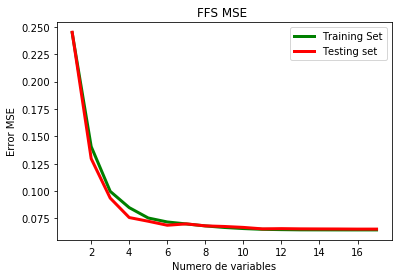

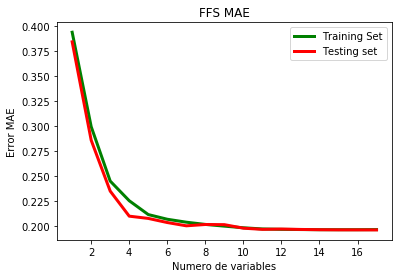

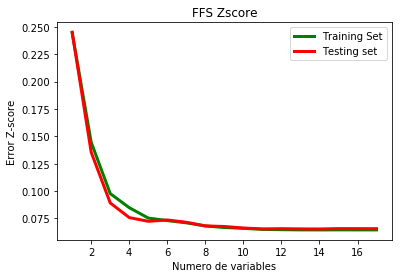

In [21]:
def fss_mse( x , y , xtest, ytest, names_x, k = 10000):
   p = x.shape[1] - 1
   k = min(p,k)
   names_x = np.array(names_x)
   remaining = range(1,p+1)
   training_error = []
   test_error = []
   selected = [0]
   current_score = 0.0
   best_new_score = 0.0
   fss_mse = []

   while remaining and len(selected) <= k :
      score_candidates = []
      for candidate in remaining:
         model = lm.LinearRegression(fit_intercept = False)
         indexes = selected + [candidate]

         x_train = x[:,indexes]
         x_test = xtest[:,indexes]

         predictions_train = model.fit(x_train,y).predict(x_train)
         residuals_train = predictions_train - y

         predictions_test = model.fit(x_train,y).predict(x_test)
         residuals_test= predictions_test - ytest
         mse_train_candidate = np.mean(np.power(residuals_train,2))
         mse_test_candidate = np.mean(np.power(residuals_test,2))
         score_candidates.append((mse_train_candidate, mse_test_candidate ,candidate))

      score_candidates.sort()
      score_candidates[:] = score_candidates[::-1]
      best_new_score , test_score, best_candidate = score_candidates.pop()
      training_error.append(best_new_score)
      test_error.append(test_score)
      remaining.remove(best_candidate)
      selected.append(best_candidate)
      print  "selected = %s ..." %names_x[best_candidate-1]
      fss_mse.append(best_new_score)
      print  "totalvars = %d, mae = %f " %(len(indexes), best_new_score)
   #print fss_mse
   return selected , training_error, test_error

#
#Forward Step-Wise Selection with Mean Absolute Error
#
def fss_mae( x , y , xtest, ytest, names_x, k = 10000):
   p = x.shape[1] - 1
   k = min(p,k)
   names_x = np.array(names_x)
   remaining = range(1,p+1)
   training_error = []
   test_error = []
   selected = [0]
   current_score = 0.0
   best_new_score = 0.0
   fss_mae = [] 

   while remaining and len(selected) <= k :
      score_candidates = []
      for candidate in remaining:
         model = lm.LinearRegression(fit_intercept = False) 
         indexes = selected + [candidate]
         x_train = x[:,indexes]
         x_test = xtest[:,indexes]

         predictions_train = model.fit(x_train,y).predict(x_train)
         residuals_train = np.fabs(predictions_train - y)

         predictions_test = model.fit(x_train,y).predict(x_test)
         residuals_test = np.fabs(predictions_test - ytest)

         mae_training_candidate = np.mean(residuals_train)
         mae_test_candidate = np.mean(residuals_test)
         score_candidates.append((mae_training_candidate,mae_test_candidate , candidate))

      score_candidates.sort()
      score_candidates[:] = score_candidates[::-1]
      best_new_score , test_score ,best_candidate = score_candidates.pop()
      training_error.append(best_new_score)
      test_error.append(test_score)
      remaining.remove(best_candidate)
      selected.append(best_candidate)
      print  "selected = %s ..." %names_x[best_candidate-1]
      fss_mae.append(best_new_score)
      print  "totalvars = %d, mse = %f " %(len(indexes), best_new_score)
   #print fss_mae
   return selected , training_error, test_error
#
#Forward Step-Wise Selection with Z-score
#
def fss_zscore( x , y , xtest, ytest, names_x, k = 10000):
   p = x.shape[1] - 1
   k = min(p,k)
   names_x = np.array(names_x)
   remaining = range(1,p+1)
   selected = [0]
   training_error = []
   test_error = []
   current_score = 0.0
   best_new_score = 0.0

   while remaining and len(selected) <= k :
      score_candidates = []
      for candidate in remaining:
         model = lm.LinearRegression(fit_intercept = False)
         indexes = selected + [candidate]
         
         x_train = x[:,indexes]
         x_test = xtest[:,indexes]
         
         linreg = model.fit(x_train,y)
         std_reg = getStandardRegressionError(linreg, x_train , y )
         
         zscore_candidate = abs(getZscore(linreg,std_reg,len(selected)+1)[-1])

         predictions_train = model.fit(x_train,y).predict(x_train)
         residuals_train = predictions_train - y

         predictions_test = model.fit(x_train,y).predict(x_test)
         residuals_test = predictions_test - ytest

         zscore_train_residual = np.mean(np.power(residuals_train,2))
         zscore_test_residual = np.mean(np.power(residuals_test,2))
   
         score_candidates.append((zscore_candidate,zscore_train_residual,zscore_test_residual ,candidate))

      score_candidates.sort()
      #print score_candidates[-1]
      best_new_score , train_residual, test_residual, best_candidate = score_candidates.pop()
      #print best_new_score
      training_error.append(train_residual)
      test_error.append(test_residual)
      remaining.remove(best_candidate)

      selected.append(best_candidate)
      print  "selected = %s ..." %names_x[best_candidate-1]
      print  "totalvars = %d, zscore = %f " %(len(indexes), best_new_score)
   return selected , training_error, test_error

def plotFSS(train_error,test_error, method):
    p = range(1,18)
    plt.plot(p,train_error, color="green", linewidth=3, label = "Training Set")
    plt.plot(p,test_error, color="red",linewidth=3, label = "Testing set")
    plt.legend()
    axes = plt.gca()
    if method == "mse":
        plt.xlabel('Numero de variables')
        plt.ylabel('Error MSE')
        plt.title('FFS MSE ')
        
    
    if method == "mae":
        plt.xlabel('Numero de variables')
        plt.ylabel('Error MAE')
        plt.title('FFS MAE')
        
        
    if method == "zscore":
        plt.xlabel('Numero de variables')
        plt.ylabel('Error Z-score')
        plt.title('FFS Zscore')
        
    plt.show()

selected_mse , train_error_mse , test_error_mse  = fss_mse( Xtrain.as_matrix() ,ytrain.as_matrix() , Xtest.as_matrix() ,ytest.as_matrix() ,names_regressors )

selected_mae , train_error_mae, test_error_mae = fss_mae( Xtrain.as_matrix() ,ytrain.as_matrix() , Xtest.as_matrix() ,ytest.as_matrix() ,names_regressors )

selected_z , train_error_z, test_error_z = fss_zscore( Xtrain.as_matrix() ,ytrain.as_matrix() , Xtest.as_matrix() ,ytest.as_matrix() ,names_regressors )

plotFSS(train_error_mse , test_error_mse, "mse")
plotFSS(train_error_mae , test_error_mae, "mae")
plotFSS(train_error_z , test_error_z, "zscore")

En base a los gráficos anteriores, se puede visualizar que a medida que se van añadiendo variables al modelo, el error tiende a disminuir. Cabe destacar, que entre los rangos de 2 a 6 variables, de forma leve el error de entrenamiento es más alto que el error de prueba.

<table style="width:100%">
    <tr>
        <th>Selección</th>
        <th>fss_mse</th>
        <th>mse</th>
        <th>fss_mae</th>
        <th>mae</th>
        <th>fss_zscore</th>
        <th>zscore</th>
    <tr><td>1</td><td>intercept</td><td>0.24468</td><td>intercept</td><td>0.39386</td><td>intercept</td><td>2095.77748</td></tr>
<tr><td>2</td><td>grade</td><td>0.14069</td><td>grade</td><td>0.29948</td><td>long</td><td>0.0</td></tr>
<tr><td>3</td><td>lat</td><td>0.09976</td><td>lat</td><td>0.24507</td><td>yr_built</td><td>71.68538</td></tr>
<tr><td>4</td><td>sqft_living</td><td>0.08488</td><td>sqft_living</td><td>0.22543</td><td>condition</td><td>61.57327</td></tr>
<tr><td>5</td><td>yr_built</td><td>0.0754</td><td>yr_built</td><td>0.2116</td><td>sqft_lot15</td><td>57.02571</td></tr>
<tr><td>6</td><td>view</td><td>0.07178</td><td>view</td><td>0.20692</td><td>sqft_lot</td><td>37.58094</td></tr>
<tr><td>7</td><td>sqft_living15</td><td>0.06998</td><td>bathrooms</td><td>0.20398</td><td>yr_renovated</td><td>41.0767</td></tr>
<tr><td>8</td><td>bathrooms</td><td>0.06817</td><td>sqft_living15</td><td>0.20175</td><td>waterfront</td><td>17.0613</td></tr>
<tr><td>9</td><td>condition</td><td>0.06675</td><td>condition</td><td>0.20002</td><td>view</td><td>0.0</td></tr>
<tr><td>10</td><td>waterfront</td><td>0.06576</td><td>floors</td><td>0.1984</td><td>sqft_basement</td><td>0.0</td></tr>
<tr><td>11</td><td>floors</td><td>0.06505</td><td>waterfront</td><td>0.19723</td><td>bedrooms</td><td>12.40043</td></tr>
<tr><td>12</td><td>sqft_lot</td><td>0.06478</td><td>sqft_lot</td><td>0.19681</td><td>floors</td><td>9.0825</td></tr>
<tr><td>13</td><td>yr_renovated</td><td>0.06458</td><td>bedrooms</td><td>0.19663</td><td>bathrooms</td><td>7.96331</td></tr>
<tr><td>14</td><td>bedrooms</td><td>0.06455</td><td>yr_renovated</td><td>0.19647</td><td>sqft_living</td><td>6.6508</td></tr>
<tr><td>15</td><td>sqft_basement</td><td>0.06453</td><td>sqft_basement</td><td>0.19646</td><td>sqft_above</td><td>5.72903910048e+14</td></tr>
<tr><td>16</td><td>sqft_lot15</td><td>0.06452</td><td>sqft_lot15</td><td>0.19647</td><td>sqft_living15</td><td>2.68489</td></tr>
<tr><td>17</td><td>long</td><td>0.06452</td><td>sqft_above</td><td>0.19657</td><td>grade</td><td>2.47045</td></tr>
<tr><td>18</td><td>sqft_above</td><td>0.06451</td><td>long</td><td>0.19657</td><td>lat</td><td> 2.47044</td></tr>

    
</table>

De esta tabla se puede apreciar que las variables importantes que se habían deducido anteriormente aparecen en el mismo orden o tienen un patrón de entrada al modelo en el sentido de que siempre ingresa el año de construcción(*yr_built*), luego la condición de la casa (*condition*) y finalmente los pisos(*floor*). También es posible notar que una de las variables que se repite de las cuales tienen menos efecto en el modelo es *sqft_above*. 

Los criterios de error cuadratico medio y error absoluto medio se comportan de forma muy similar, de hecho son muy perceptibles a la sensibilidad de cada valor ya que un mínimo cambio(0,00001) puede hacer cambiar el orden de la selección.

# Parte 3

### a) Ridge Regression
A continuación se realiza un ajuste con un regularizador de norma $l_2$, como lo es Ridge Regression 
. Esta regularización se realiza con un parámetro de regularización $\lambda$ en el intervalo $[10^7,10^1]$.


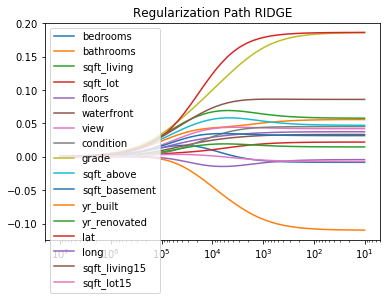

In [22]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
    ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Ridge Regression reduce los coeficientes de regresión con una variable $\lambda$, imponiendo una penalización al valor de cada coeficiente, mientras mas grande sea $\lambda$ , mayor será la reducción, por lo que hay buscar un valor de $\lambda$ eficiente, dado que si $\lambda$ es muy grande, el modelo puede sufrir <strong>underfitting</strong> o un bias elevado, mientras que un $\lambda$ demasiado bajo, puede no afectar al modelo en absoluto y no observar cambios en el <strong>overffiting</strong>.
<br>
<br>
Para aplicar Ridge Regressión es necesario que los datos estén estandarizados y eliminar el intercepto en la penalización, dado que si se penaliza el intercepto, se generará un procedimiento dependiente del origen del eje $Y$

De la implementación anterior, es importante destacar que en las líneas 3 y 9 no consideran el intercepto. En la línea 3, se elimina del dataframe, mientas que en la línea 9, se indica que se debe calcular el intercepto en el modelo de Ridge. 
Del gráfico se puede observar que a medida que aumenta el $\lambda$ los coeficientes tienden a concentrarse en un pequeño rango entre -0,05 y 0.05. Con un valor relativamente pequeño para $\lambda$ la penalización que se realiza va afectando cada vez menos a los coeficientes de los atributos tal como se vió en  1 f).

### b)  Lasso 

A continuación se realiza un ajuste con un regularizador de norma *l1*, como lo es Lasso. Esta regularización se realiza con un parámetro de regularización $\lambda$ en el intervalo $[10^0,10^{-3}]$.
Cabe destacar que para esta implementación tampoco se toma en cuenta el intercepto original.

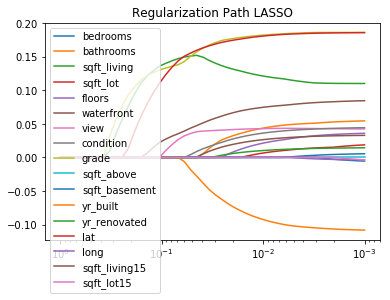

In [23]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
    ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr,label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Del gráfico podemos observar que el  $\lambda$ es mas sensible en comparación con Ridge, dado que con un  $\lambda = 1 $ lleva  los coeficientes de todas las variables a 0, mientras que Ridge mientras esta misma condición el efecto es casi nulo respecto al valor original de los coeficientes. Se aprecia además, como los coeficientes son llevados directamente a 0 mediante este método a diferencia donde los coeficientes de Ridge pueden llegar muy cercano a 0 pero no son nulos. Lo anterior se visualiza a través de las 2 gráficas dado que para Ridge la curva de cada predictor es suave, mientras en Lasso la curva de nacimiento de un predictor es brusca.

En cierta medida Lasso es más efectivo en la elección de atributos dado que para cierto $\lambda$ indica que atributos son los que no hay que seleccionar ya que se trunca directamente a 0, mientras que Ridge en estas mismas condiciones nos indica los coeficientes de los predictores que menos afectan pero el analista de estos datos es el que debe determinar desde que valor no seleccionar estos atributos.

### c) Error de entrenamiento vs error de prueba en Ridge


Vamos a escoger Ridge dado que este método se recomienda cuando los atributos poseen baja dimensionalidad, y no nos interesa realizar una penalización tan agresiva como la de Lasso, esto es, no se truncará una variable en su totalidad.

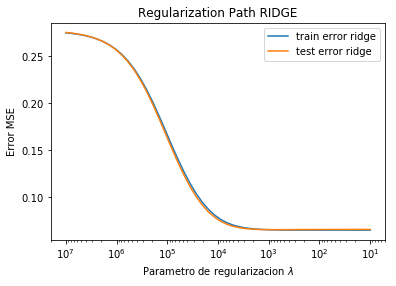

In [39]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
plt.title('Regularization Path RIDGE')
plt.xlabel('Parametro de regularizacion $\lambda$')
plt.ylabel('Error MSE')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

A partir del gráfico se puede observar que el comportamiento de ambas curvas es idéntico a medida que disminuye el parámetro de regularización $\lambda$. Con un parámetro alto de lambda el error también se incrementa dado que penaliza de manera excesiva al modelo, a su vez, a medida que disminuye el orden de magnitud del parámetro de regularización el error tiende a disminuir dado que se asemeja al modelo sin una regularización, el cual original originalmente posee un error bajo.

### d) Estimación parámetro de regularización

In [41]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True,solver='svd')
alphas_ = np.logspace(7,1,base=10)
#print(largo)
#print(alphas_)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a

print "Mejor parámetro lambda = %f, MSE(Cross Validation)=%f"%(best_alpha,best_cv_mse)

Mejor parámetro lambda = 30.888436, MSE(Cross Validation)=0.064682


# Parte 4

Se genera una pequeña muestra A, la cual es extraída directamente de los datos actuales y una muestra B estratificada, esto es, generada con el propósito de que en cada intervalo del rango de valores haya aproximadamente la misma cantidad de datos.

In [42]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

## a)  Hold out validation

A continuación se procede a la creación de conjuntos con una proporción de 70% para entrenamiento y 30% para validación.

In [27]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

Se trabajará cada muestra mediante la técnica *hold out validation* la cual es la versión simplificado de K cross validation  ya que se basa en una sola validación.

## b) Regresión lineal en muestra A y B.

Se procede a evaluar los dos modelos de regresión lineal con cada muestra, normal y uniforme. Se mide el error de cada modelo sobre ambos conjuntos de validación (A y B). 

In [48]:
linreg = lm.LinearRegression(fit_intercept = True)

modelo_A = linreg.fit(Xtrain_A, ytrain_A)
yhat_valA = modelo_A.predict(Xval_A)
yhat_valB = modelo_A.predict(Xval_B)
val_errorA = np.mean(np.power(yhat_valA - yval_A, 2))
val_errorB = np.mean(np.power(yhat_valB - yval_B, 2))
print "Error de validación modelo A sobre muestra A:",val_errorA
print "Error de validación modelo A sobre muestra B:",val_errorB

modelo_B = linreg.fit(Xtrain_B, ytrain_B)
yhat_valA = modelo_B.predict(Xval_A)
yhat_valB = modelo_B.predict(Xval_B)
val_errorB = np.mean(np.power(yhat_valB - yval_B, 2))
val_errorA = np.mean(np.power(yhat_valA - yval_A, 2))
print "Error de validación modelo B sobre muestra A:",val_errorA
print "Error de validación modelo B sobre muestra B:",val_errorB

#Comparar modelo de B con los datos de A y entrenar sobre 
#Use el modelo para entrenar en B y usar la predicción en A.


Error de validación modelo A sobre muestra A: 0.0716060037342
Error de validación modelo A sobre muestra B: 0.151563428574
Error de validación modelo B sobre muestra A: 0.0828509841284
Error de validación modelo B sobre muestra B: 0.119065298409


Podemos observar sobre la muestra de datos A ( con distribución normal ) que con el modelo A se obtiene un menor error de validación con respecto a la misma muestra en el modelo B, además los errores de validación de la muestra A en ambos modelos son menores en magnitud que los obtenidos con la muestra B, esto se debe a que la distribución normal se ajusta mejor a una distribución de datos. Con la muestra B se aprecia que el modelo A tiene un mayor error de validación respecto al modelo B. Así se puede apreciar que los errores sobre la muestra A son menores que los de la muestra B, esto se puede deber a que la distribución normal es más probable para el comportamiento de nuevos datos.

## c) Elección de modelo

En base a lo calculado en el item anterior, eligiremos el modelo B dado que el promedio de errores de validación entre las muestras A y B es menor al obtenido con el modelo A.